In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN


In [2]:
df = pd.read_csv('Mall Customers.csv')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_14092\1224374545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['Genre'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_14092\1224374545.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['Genre'].value_counts().index,


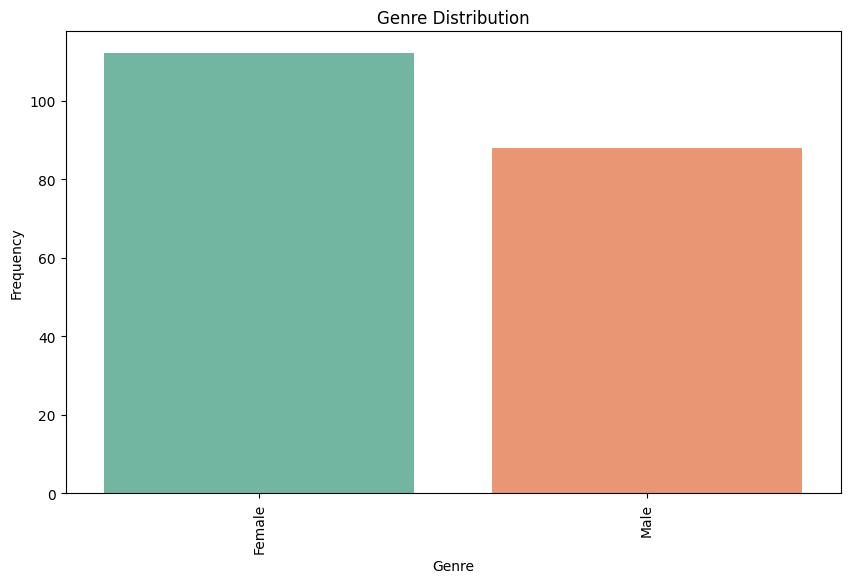

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['Genre'].value_counts().index,
            y=df['Genre'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

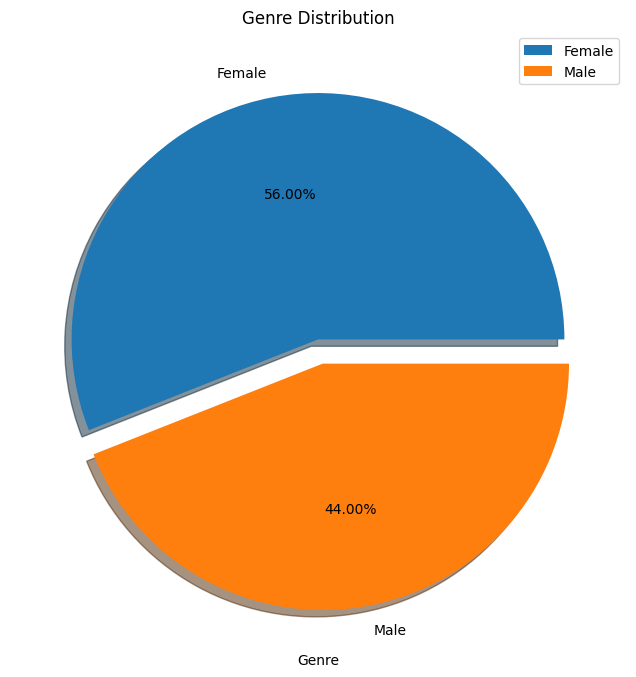

In [8]:
plt.figure(figsize=(10, 8))
plt.pie(df['Genre'].value_counts(),
        explode=[0,0.1],
        labels=df['Genre'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.legend()
plt.show()

In [12]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

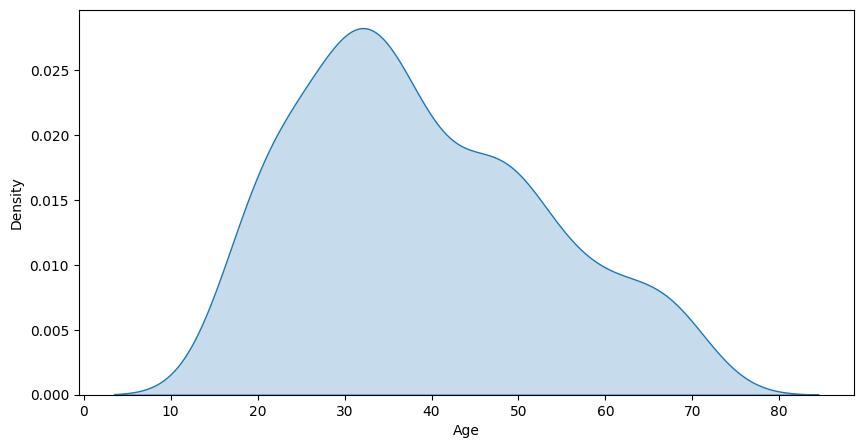

In [13]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Age'],fill=True)
plt.show()


In [16]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

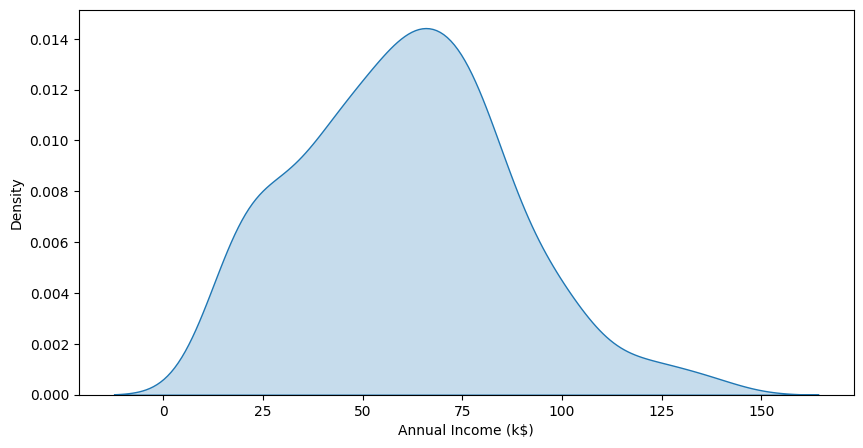

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Annual Income (k$)'],fill=True)
plt.show()


In [21]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

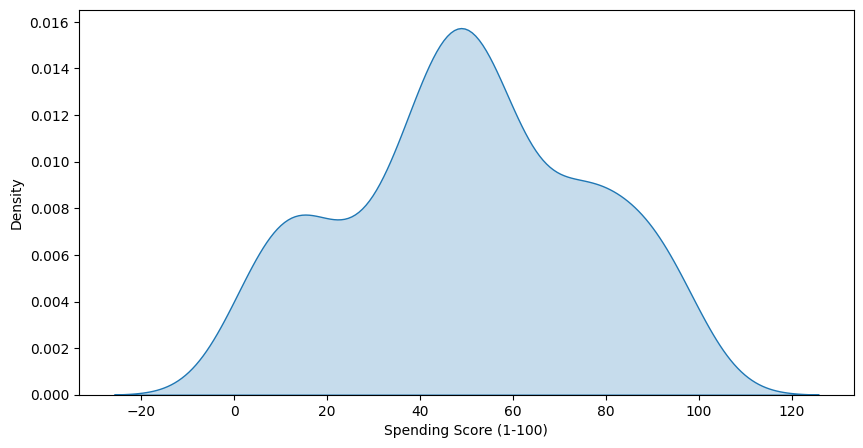

In [23]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Spending Score (1-100)'],fill=True)
plt.show()


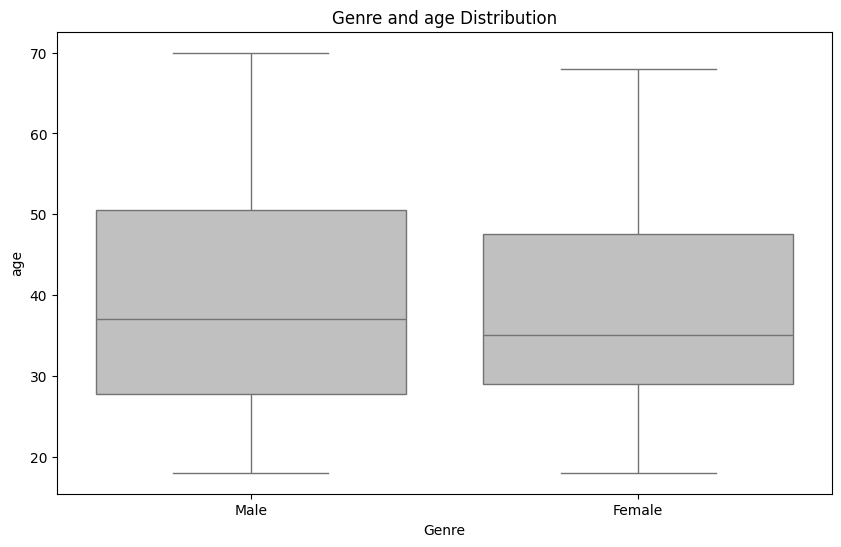

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Genre'],y= df['Age'], color='silver')
plt.title('Genre and age Distribution')
plt.xlabel('Genre')
plt.ylabel('age')
plt.show()

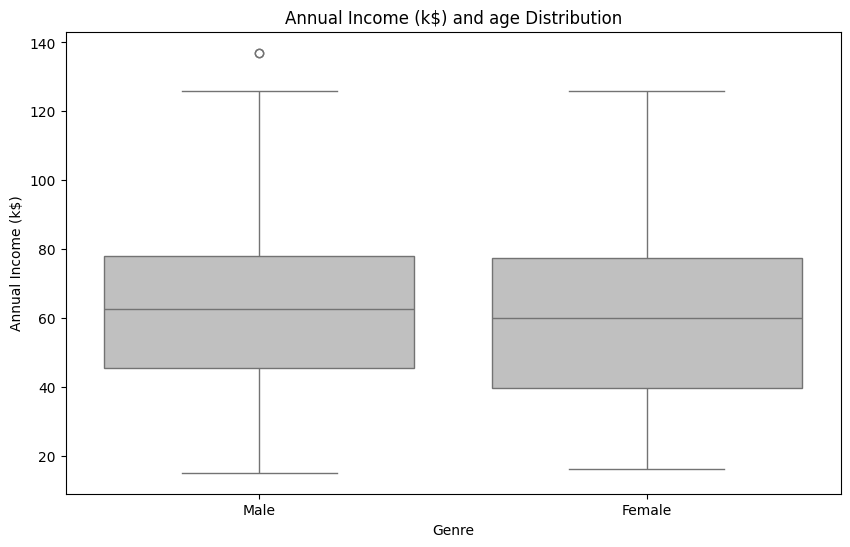

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Genre'],y= df['Annual Income (k$)'], color='silver')
plt.title('Annual Income (k$) and age Distribution')
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')
plt.show()

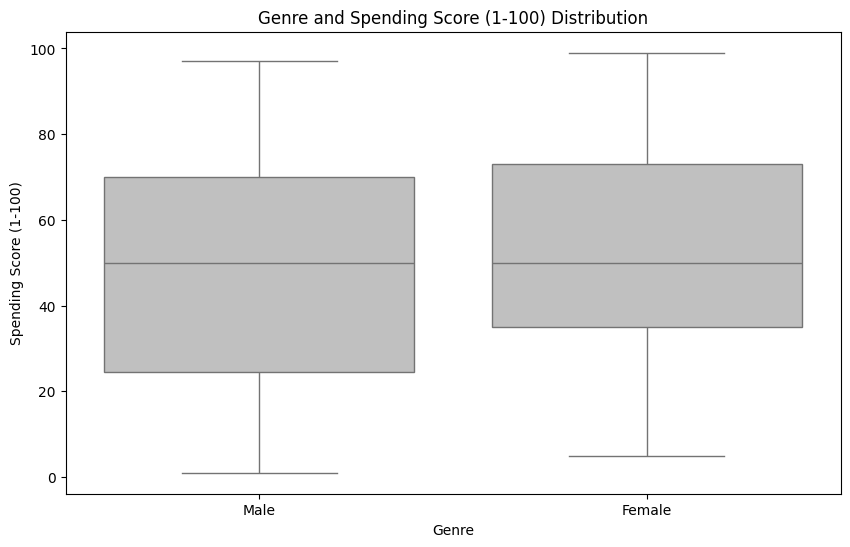

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Genre'],y= df['Spending Score (1-100)'], color='silver')
plt.title('Genre and Spending Score (1-100) Distribution')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

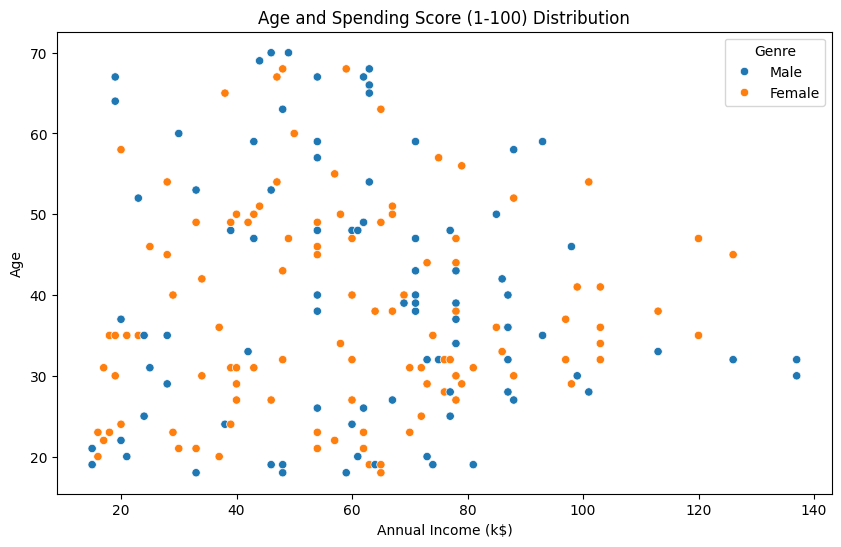

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Annual Income (k$)'],y= df['Age'],hue=df['Genre'])
plt.title('Age and Spending Score (1-100) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

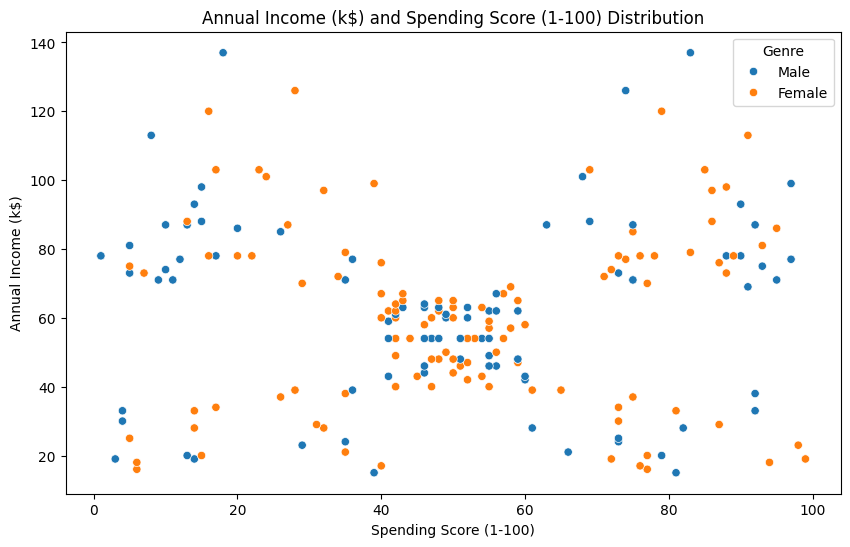

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Spending Score (1-100)'],y= df['Annual Income (k$)'],hue=df['Genre'])
plt.title('Annual Income (k$) and Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

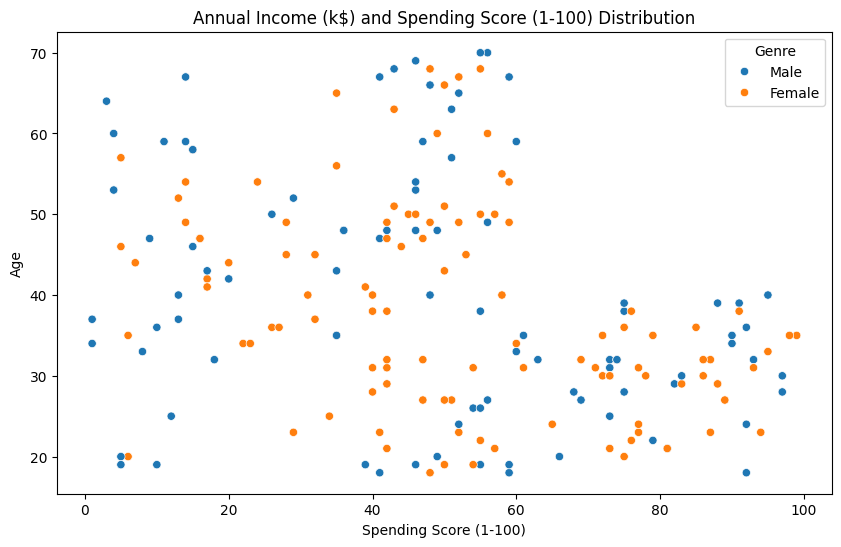

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Spending Score (1-100)'],y= df['Age'],hue=df['Genre'])
plt.title('Annual Income (k$) and Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

In [67]:
from sklearn.cluster import KMeans,DBSCAN


In [48]:
df.drop(columns=['CustomerID'], inplace=True)


In [51]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [52]:
# Apply standard scaling
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

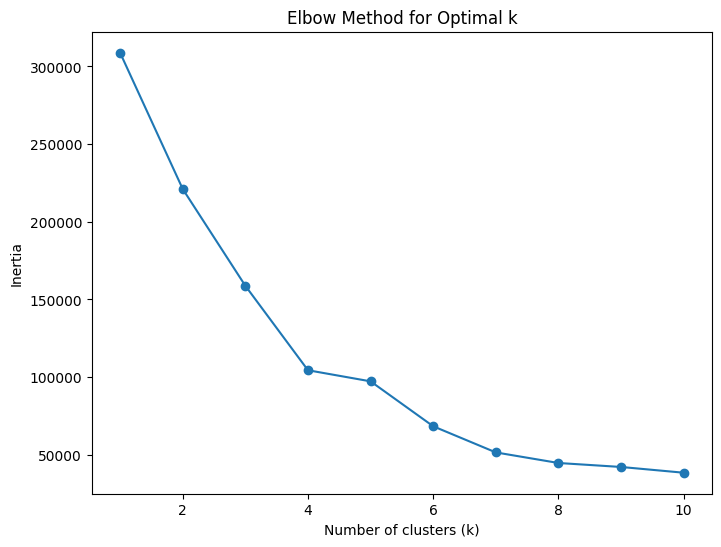

In [53]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

In [64]:
# Calculate silhouette score for K-Means
kmeans_score = silhouette_score(df, kmeans.labels_)
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")

K-Means Silhouette Score: 0.36


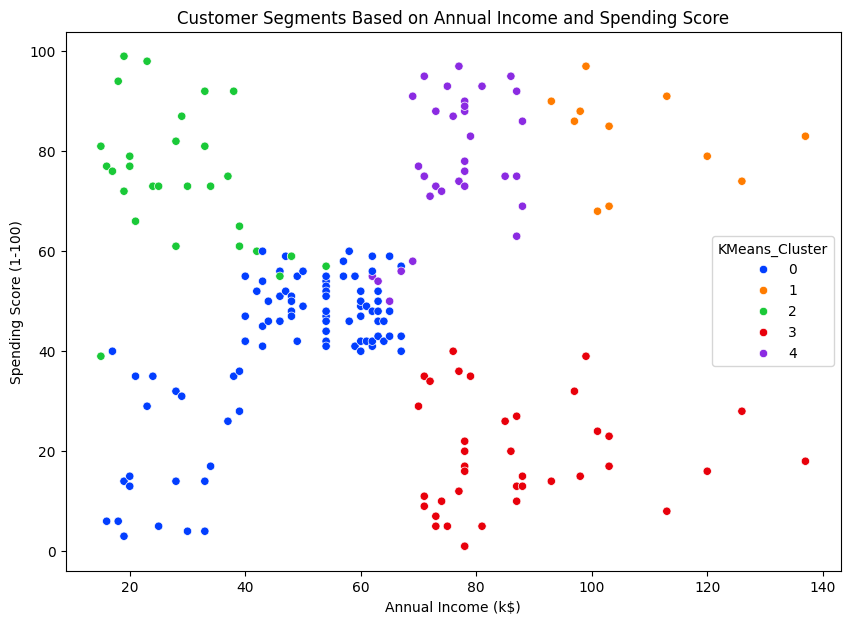

In [65]:

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='bright')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

In [69]:
dbscan = DBSCAN(eps=12, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

In [70]:
dbscan_labels = df['DBSCAN_Cluster']
valid_mask = dbscan_labels != -1  # Boolean mask for valid clusters
valid_features = df[valid_mask]
valid_labels = dbscan_labels[valid_mask]

In [71]:
if len(np.unique(valid_labels)) > 1:
    dbscan_score = silhouette_score(valid_features, valid_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_score:.2f}")
else:
    print("DBSCAN produced too many noise points. No valid clusters found.")

DBSCAN Silhouette Score: 0.34


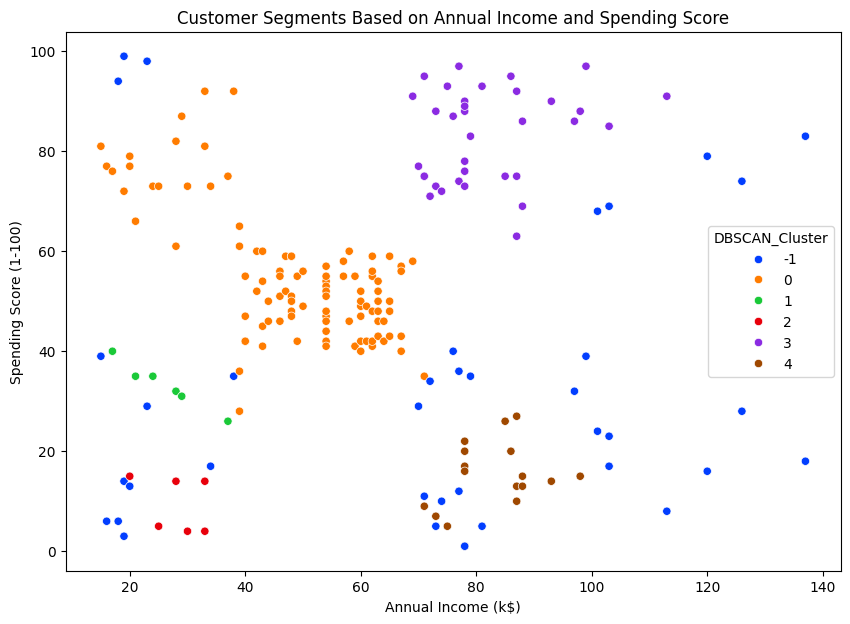

In [72]:
# Visualize Clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='bright')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

In [73]:
cluster_summary = df.groupby('DBSCAN_Cluster').agg(
    Average_Age=('Age', 'mean'),
    Average_Income=('Annual Income (k$)', 'mean'),
    Average_Spending_Score=('Spending Score (1-100)', 'mean'),
    Customer_Count=('Age', 'count')
)

# Display the cluster summary
print("\nCluster Summary:")
cluster_summary


Cluster Summary:


,Average_Age,Average_Income,Average_Spending_Score,Customer_Count
DBSCAN_Cluster,,,,
-1,37.054054,72.324324,33.756757,37
0,39.670000,49.150000,54.560000,100
1,37.000000,26.000000,33.166667,6
2,53.333333,28.166667,9.333333,6
3,32.882353,82.000000,83.235294,34
4,45.411765,82.823529,14.705882,17


In [49]:
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
